Detect Corner 

In [1]:
import cv2
import numpy as np

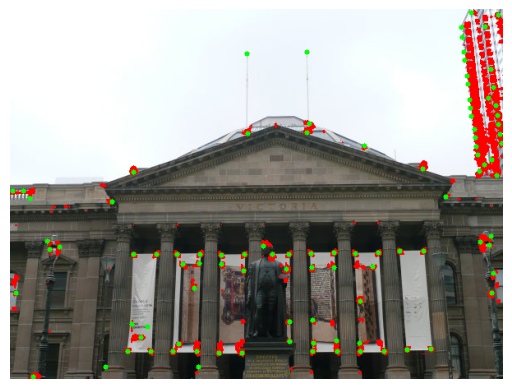

In [12]:
import matplotlib.pyplot as plt

# Path to the image file
image_path = "../Data/Train/Set1/1.jpg"  # Ensure the correct image file name and type

# Read the image from the specified path
img = cv2.imread(image_path)
# Check if the image was successfully read
if img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the Harris corner detection
# img: input image
# blocksize: size of the neighborhood considered for corner detection
# ksize: aperture parameter of the Sobel derivative used
# k: Harris detector free parameter
probab_corner = cv2.cornerHarris(gray, 7, 11, 0.04)

# Apply the Shi-Tomasi corner detection
# gray: input image in grayscale
# maxCorners: maximum number of corners to return
# qualityLevel: minimum accepted quality of image corners
# minDistance: minimum possible Euclidean distance between the returned corners
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
# Convert the corner coordinates to integer values
shi_tomasi_corners = np.intp(shi_tomasi_corners)

# Draw strong Harris corners in the image
strong_corners = probab_corner > 0.01 * probab_corner.max()
img[strong_corners] = [0, 0, 255]

# Draw Shi-Tomasi corners on the image
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Display the image with highlighted strong corners using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [32]:
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
import math

In [ ]:
# We will now try to look for local maxima in probab_corner

# probab_corner
threshold= 0.01*probab_corner.max()
probab_corner= np.where(probab_corner>threshold, probab_corner, 0)
local_maximas= peak_local_max(probab_corner, min_distance=7)


# Checking stuff
# print(type(local_maximas))
# print(local_maximas)
# plt.imshow(probab_corner, cmap='gray')
# plt.plot(local_maximas[:, 1], local_maximas[:, 0], 'r.')
# plt.show()

# Ordering functions
def dist(coord1, coord2):
    return np.sqrt((coord1[0]-coord2[0])**2+(coord1[1]-coord2[1])**2)

# Ordering by distance
def calc_distances(coords):
    distances= {}
    total_elements=coords.size
    for i in range(total_elements):
        if i not in distances:
            distances[i]= math.inf
        for j in range(i+1, total_elements):
            if j not in distances:
                distances[j]= math.inf
            temp_dist= dist(coords[i], coords[j])
            if(temp_dist<distances[i]):
                distances[i]=temp_dist
            if(temp_dist<distances[j]):
                distances[j]=temp_dist
    return distances

def select_top(n, coords):
    distances= calc_distances(coords)
    top_n=[]
    distances= dict(sorted(distances.items(), key=lambda item: item[1], reverse=True))
    print(distances)
    print(distances.keys())
    for i in range(n):
        top_n.append()

select_top(10,local_maximas)

print(local_maximas.size)
print(type(local_maximas[0,0]))

TypeError: select_top() missing 1 required positional argument: 'coords'